In [1]:
# CARGA DE PAQUETES
# Importar paquete de folium, Pandas y geopandas
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
%matplotlib inline

import calendar

import folium
from folium import plugins


import locale




In [2]:
# VARIABLES GLOBALES
archivo_datos = "datos/ara-ambiguus-cr.csv"
nombre_cientifico = "Ara ambiguus"

pd.options.display.max_rows = 8

In [3]:
registros_presencia_df = pd.read_csv(archivo_datos, sep='\t')
registros_presencia_df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,2862500609,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/58528653,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,Jimmy Barrantes,2020-09-04T18:26:16,CC_BY_NC_4_0,Jimmy Barrantes,Jimmy Barrantes,NaN,NaN,2020-10-25T15:43:27.858Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84
1,2851290613,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/56352076,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,Guenther Eichhorn,2020-08-13T20:10:13,CC_BY_NC_4_0,Guenther Eichhorn,Guenther Eichhorn,NaN,NaN,2020-10-25T15:43:01.059Z,StillImage,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84
2,2845294372,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/169189457,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_NC_4_0,Stichting Natuurinformatie,NaN,NaN,NaN,2020-09-05T06:45:27.187Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
3,2845178469,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/166949654,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_NC_4_0,Stichting Natuurinformatie,NaN,NaN,NaN,2020-09-05T06:45:26.782Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...
4,2845109461,8a863029-f435-446a-821e-275f4f641165,https://observation.org/observation/185649454,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Ara,Ara ambiguus,...,NaN,NaN,CC_BY_NC_4_0,Stichting Natuurinformatie,NaN,NaN,NaN,2020-09-05T06:45:12.137Z,NaN,COORDINATE_ROUNDED;OCCURRENCE_STATUS_INFERRED_...


In [4]:
# Selección de un subconjunto de columnas
registros_presencia_df = registros_presencia_df[['stateProvince', 'locality', 'decimalLongitude', 'decimalLatitude', 'eventDate']]
registros_presencia_df

,stateProvince,locality,decimalLongitude,decimalLatitude,eventDate
0,Alajuela,NaN,-84.311829,10.293973,2020-09-04T12:18:54
1,Limón,NaN,-83.504336,10.485501,2019-04-19T15:31:00
2,NaN,Costa Rica - Pococí,-83.661127,10.501265,2017-08-09T00:00:00
3,NaN,Costa Rica - Tortuguero,-83.502708,10.537014,2019-01-26T00:00:00
...,...,...,...,...,...
319,NaN,Cerro Tortuguero,-83.526981,10.584467,2000-11-17T00:00:00
320,NaN,Cerro Tortuguero,-83.526981,10.584467,2003-01-04T00:00:00
321,NaN,Cerro Tortuguero,-83.526981,10.584467,2004-10-12T00:00:00
322,NaN,Caño Palma (Canadian Organization for Tropical...,-83.529325,10.593861,2001-10-29T00:00:00


In [5]:
# Consulta del tipo de datos de una columna
registros_presencia_df.eventDate.dtypes

dtype('O')

In [6]:
# Cambio del tipo de datos dateTime
registros_presencia_df["eventDate"] = pd.to_datetime(registros_presencia_df["eventDate"])
registros_presencia_df.eventDate.dtypes

dtype('<M8[ns]')

In [7]:
# Estilo de los gráficos
plt.style.use('ggplot')

In [8]:
# Agrupación de los registros por mes
registros_x_mes = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.month).count().eventDate
locale.setlocale(locale.LC_ALL, ("es_ES", "UTF-8"))
registros_x_mes.index=[calendar.month_name[x] for x in range(1,13)]
registros_x_mes


enero         46
febrero       49
marzo         37
abril         24
              ..
septiembre     5
octubre       14
noviembre     25
diciembre     22
Name: eventDate, Length: 12, dtype: int64

# __Gráfico de barras por mes__

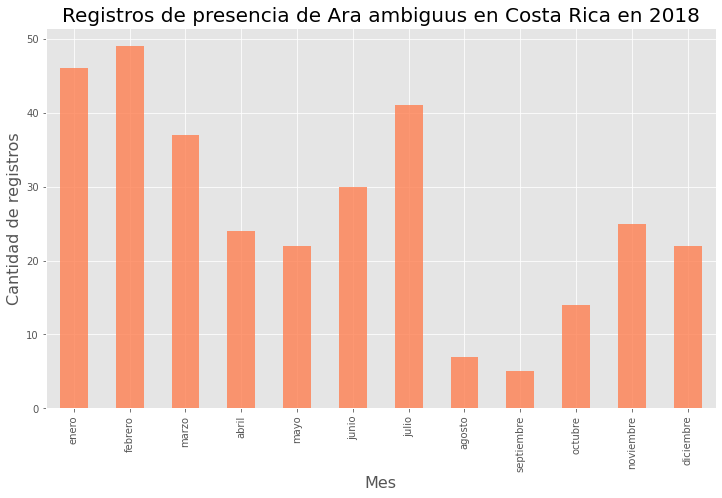

In [9]:
# Gráfico de barras
registros_x_mes.plot(kind='bar',figsize=(12,7), color='coral', alpha= 0.8)

# Título y leyendas en los ejes
plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica en 2018', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [10]:
# Agrupación de los registros por año
registros_x_ano = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.year).count().eventDate

registros_x_ano

eventDate
1933.0     2
2000.0     1
2001.0     2
2002.0     2
          ..
2017.0    33
2018.0    52
2019.0    86
2020.0     9
Name: eventDate, Length: 19, dtype: int64

# Gráfico de barras por año

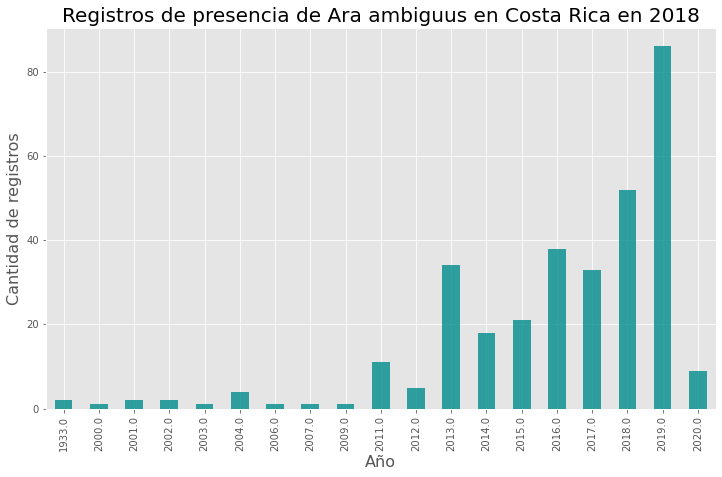

In [11]:
# Gráfico de barras
registros_x_ano.plot(kind='bar',figsize=(12,7), color='darkcyan', alpha= 0.8)

# Título y leyendas en los ejes
plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica en 2018', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

# __Mapa de registros puntuales__

In [12]:
registros_presencia_geom = [Point(xy) for xy in zip(registros_presencia_df["decimalLongitude"], registros_presencia_df["decimalLatitude"])]
registros_presencia_gdf=gpd.GeoDataFrame(registros_presencia_df, crs={"init": "epsg:4326"}, geometry=registros_presencia_geom)

C:\Users\gabriel.corrales\Anaconda3\envs\leccion-12a\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [13]:
# Mapa centrado en Costa Rica
registros_presencia_mapa = folium.Map(location=[9.65, -84], zoom_start=8,control_scale=True, name='Registro de especies', tiles=False)
folium.TileLayer(
    tiles='OpenStreetMap', 
    overlay=False,
    name='Mapa Open Street Map').add_to(registros_presencia_mapa)
folium.TileLayer(
    tiles='Stamen Terrain',
    overlay=False,
    name='Mapa Stamen Terrain').add_to(registros_presencia_mapa)

# Mapeo de los puntos correspondientes a los registros de presencia
for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='green',
        fill=True,
        popup=label,
        fill_color='darkred',
        fill_opacity=0.6
    ).add_to(registros_presencia_mapa)
    
folium.LayerControl(position='bottomleft', 
                   collapsed=True,
                   addOverlay=True,
                   autoZIndex=True,
                   hideSingleBase=True,
                   sortLayers=False).add_to(registros_presencia_mapa)
    
registros_presencia_mapa

# __Mapa de registros en cluster__

In [14]:
# Mapa centrado en Costa Rica
registros_presencia_mapa = folium.Map(location=[9.65, -84], zoom_start=8,control_scale=True, name='Registro de especies en cluster', tiles=False)
folium.TileLayer(
    tiles='OpenStreetMap', 
    overlay=False,
    name='Mapa Open Street Map').add_to(registros_presencia_mapa)
folium.TileLayer(
    tiles='Stamen Terrain',
    overlay=False,
    name='Mapa Stamen Terrain').add_to(registros_presencia_mapa)

registros_presencia_cluster = plugins.MarkerCluster(name='Registro de especies en cluster').add_to(registros_presencia_mapa)

for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        name='Registros de Ara ambiguus',
    ).add_to(registros_presencia_cluster)
    

folium.LayerControl(position='bottomleft', 
                   collapsed=True,
                   addOverlay=True,
                   autoZIndex=True,
                   hideSingleBase=True,
                   sortLayers=False).add_to(registros_presencia_mapa)
    
registros_presencia_mapa